#### (5) Use the iris dataset available in sklearn package. Drop the target variable and apply Kmeans clustering algorithm. Select appropriate value for K and provide relevant performance metrics.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import metrics
# from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load iris dataset
iris = load_iris()

# Create dataframe and display it
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

# Display data description
display(iris_df.agg(['count','std','min','max','mean','median']))
display(iris_df.info())
print(f'Shape: {iris_df.shape}')

# First 5 rows
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
mean,5.843333,3.057333,3.758000,1.199333
median,5.800000,3.000000,4.350000,1.300000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

Shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X_train = iris_df.iloc[:, :].values

#n_samples is the #rows, n_features is the #cols
(n_samples , n_features) = X_train.shape

#no. of labels for the target
n_labels = len(iris.target_names)

print(f"There are {n_labels} labels: {set(iris.target)}")
print(f"There are {n_features} features")
print(f"There are {n_samples} samples")

There are 3 labels: {0, 1, 2}
There are 4 features
There are 150 samples


Finding the optimum number of clusters for k-means classification using the elbow joint method.
The elbow joint method is based on calculating the Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k) and selecting the k for which change in WSS first starts to diminish.

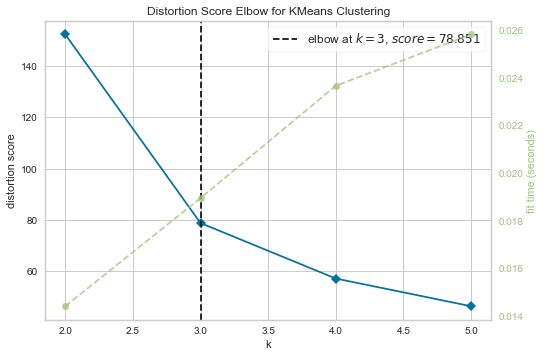

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer

random_state = 42
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(random_state=random_state), k=(2,6))

# Fit the data to the visualizer
visualizer.fit(X_train)
visualizer.show()

From the elbow joint method the optimal cluster that we can use is 3, which corresponds our number of labels.

In [5]:
model = KMeans(n_clusters = n_labels,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)

y_pred = model.fit_predict(X_train)

Total clusters:  3
Init algorithm:  k-means++
Sum of Squared Error (SSE):  78.851441426146
No. of iterations:  3


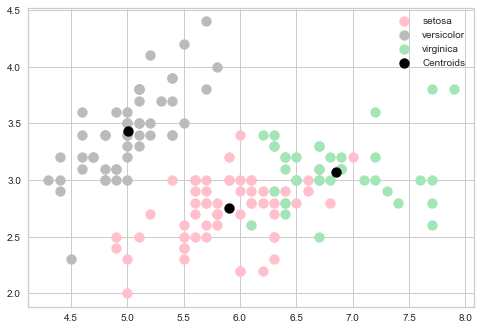

In [6]:
print('Total clusters: ', model.get_params()["n_clusters"])
print('Init algorithm: ', model.get_params()["init"])
print('Sum of Squared Error (SSE): ', model.inertia_)
print('No. of iterations: ', model.n_iter_)

# Plotting the scatter plot for different species
for i, color in enumerate([('pink'),('#BBB'),('#a3e6b5')]):
    plt.scatter(X_train[y_pred == i, 0],
                X_train[y_pred == i, 1],
                s=100,
                c=color,
                label=iris.target_names[i])
    
# Plotting the centroids
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s=100,
            c='black',
            edgecolors='black',
            label='Centroids')

plt.legend()
plt.show()

## Performance Metrics

#### Silhouette Coefficient
The Silhouette Coefficient output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

In [7]:
from sklearn.metrics import silhouette_score

silhouette_coef = silhouette_score(model.fit_transform(X_train), model.labels_).round(2)

print('Silhouette Coefficient: ', silhouette_coef)

Silhouette Coefficient:  0.66


#### Calinski-Harabasz Index
Calinski-Harabasz Index is the ratio between within-cluster dispersion and between-cluster dispersion. Higher index relates to better clustering

In [8]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(X_train, model.labels_)

561.62775662962

#### Davies-Bouldin Index
Measures how separated are the clusters. Zero is the lowest possible score. Values closer to zero indicate better partition.


In [9]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X_train, model.labels_)

0.6619715465007511